In [674]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Первичный анализ данных:


- Импортировать данные из файла ds_salaries.csv.
- Очистить данные от дубликатов и пропущенных значений.
- Исследовать типы данных, описательную статистику и корреляции между признаками.
- Визуализировать данные с помощью Matplotlib и Seaborn.

In [675]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [676]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


Данные по зар. плате специалистов, работающих в Data Science содержат информаю по 11 характеристикам, всего 3755 записей. Пропусков в данных нет.
4 характеристики (переменные): work_year, salary, salary_in_usd, remote_ratio имеют числовое значение (целочисленное), тип int64, признаки моут быть категориальными
11 характеристик - категориальные, имеют тип object.

In [677]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [678]:
df.work_year.value_counts()

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

Данные содержат информацию по зарплатам за 4 года: 76 записей за 2020 год, 230 за 2021 год, 1664 записи за 2022 год и 1785 записей за 2023 год. В качетсве таргета возьмем значение зарабатной платы в USD, для возможности анализа данных по зарплатам приведенных к одной валюте.

In [679]:
df.remote_ratio.value_counts()

remote_ratio
0      1923
100    1643
50      189
Name: count, dtype: int64

В данных представлены 3 типа работы: 100% удаленная работа, работа оффлайн и гибридный график (работа, как оффлайн, так и онлайн)

In [680]:
df.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,2516,3718,1040,3224,3004,3040,3153


In [681]:
df.experience_level.value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

В данных представлены 4 уровня опыта: SE - senior, MI - middle, EN - entry, EX - executive, заменим числовые данные по опыту категориальными (цифрами от 0 до 3, где: 0 - нет опыта, 1 - средний опыт, 2 - большой опыт, 3 - очень большой опыт)

In [682]:
def experience_category_encoder(data):
    if data == 'EN':
        return 0
    elif data == 'MI':
        return 1
    elif data == 'SE':
        return 2
    elif data == 'EX':
        return 3
    
    
df['experience_level_encoding'] = df['experience_level'].apply(experience_category_encoder)

In [683]:
df.drop(['experience_level'], axis=1, inplace=True)

In [684]:
df.employment_type.value_counts()

employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64

Employment type представлен следующими категориями: FT - полная занятость, PT - частичная занятость, CT - контракт, FL - фриланс. Сложно ранжировать эти данные, используем one hot encoding.

In [685]:
#Преобразуем колонку employment через One-hot encoding
one_hot = pd.get_dummies(df["employment_type"], drop_first=True).astype('int')
df = pd.concat((df.drop(["employment_type"], axis=1), one_hot), axis=1)
df.head()

,work_year,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_encoding,FL,FT,PT
0,2023,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,2,0,1,0
1,2023,ML Engineer,30000,USD,30000,US,100,US,S,1,0,0,0
2,2023,ML Engineer,25500,USD,25500,US,100,US,S,1,0,0,0
3,2023,Data Scientist,175000,USD,175000,CA,100,CA,M,2,0,1,0
4,2023,Data Scientist,120000,USD,120000,CA,100,CA,M,2,0,1,0


In [686]:
df.company_size.value_counts()

company_size
M    3153
L     454
S     148
Name: count, dtype: int64

В данных представлены 3 размера компании: S - маленькая компания, M - компания среднего размера, L - большая компания. Применим label-encoding, закодируем признак в значениях от 0 до 2.

In [687]:
def company_size_category_encoder(data):
    if data == 'S':
        return 0
    elif data == 'M':
        return 1
    elif data == 'L':
        return 2
    
    
df['company_size_encoding'] = df['company_size'].apply(company_size_category_encoder)
df.drop(['company_size'], axis=1, inplace=True)

In [688]:
company_locaions = df.company_location.value_counts()

In [689]:
employee_residence = df.employee_residence.value_counts()

In [690]:
companies_locations_higher_1 = []
for country in company_locaions.index:
    if company_locaions[country]/company_locaions.sum()*100 > 1:
        companies_locations_higher_1.append(country)
        
companies_locations_higher_1

['US', 'GB', 'CA', 'ES', 'IN', 'DE']

In [691]:
employee_residence_higher_1 = []
for country in employee_residence.index:
    if employee_residence[country]/employee_residence.sum()*100 > 1:
        employee_residence_higher_1.append(country)
        
employee_residence_higher_1

['US', 'GB', 'CA', 'ES', 'IN', 'DE', 'FR']

In [692]:
df.company_location = df.company_location.apply(lambda country: country if country in companies_locations_higher_1 else 'other')
df.employee_residence = df.employee_residence.apply(lambda country: country if country in employee_residence_higher_1 else 'other')

In [693]:
df.company_location.value_counts()

company_location
US       3040
other     265
GB        172
CA         87
ES         77
IN         58
DE         56
Name: count, dtype: int64

In [694]:
df.employee_residence.value_counts()

employee_residence
US       3004
other     262
GB        167
CA         85
ES         80
IN         71
DE         48
FR         38
Name: count, dtype: int64

In [695]:
df.drop(['salary', 'salary_currency'], axis=1, inplace=True)

In [696]:
df.head()

,work_year,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,experience_level_encoding,FL,FT,PT,company_size_encoding
0,2023,Principal Data Scientist,85847,ES,100,ES,2,0,1,0,2
1,2023,ML Engineer,30000,US,100,US,1,0,0,0,0
2,2023,ML Engineer,25500,US,100,US,1,0,0,0,0
3,2023,Data Scientist,175000,CA,100,CA,2,0,1,0,1
4,2023,Data Scientist,120000,CA,100,CA,2,0,1,0,1


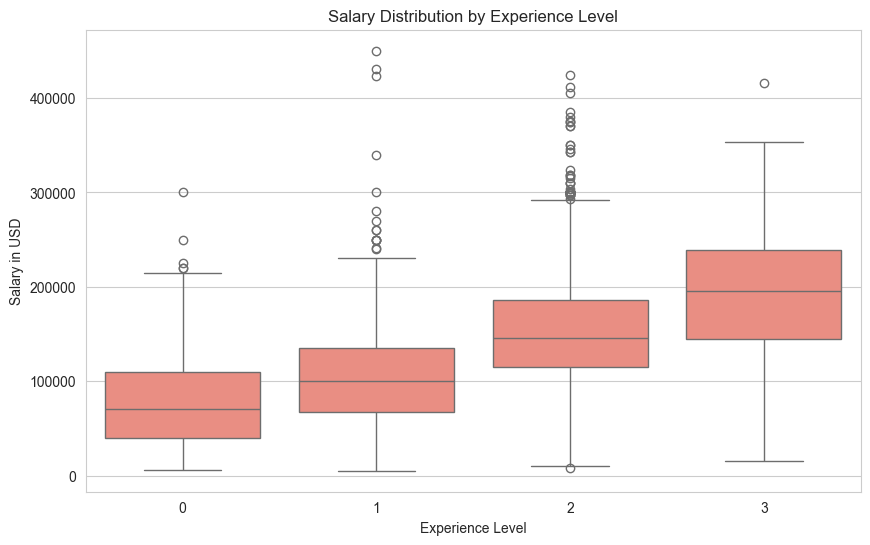

In [697]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level_encoding', y='salary_in_usd', data=df, color='salmon')
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

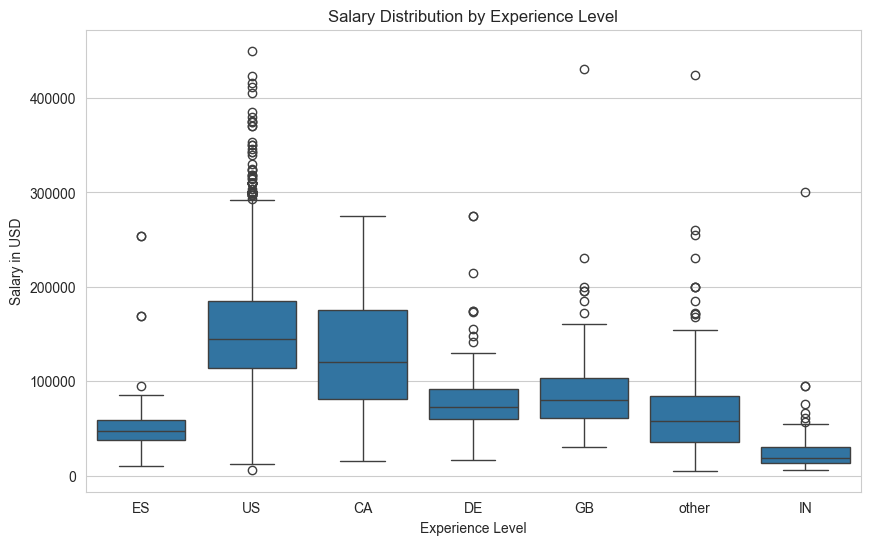

In [698]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='company_location', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

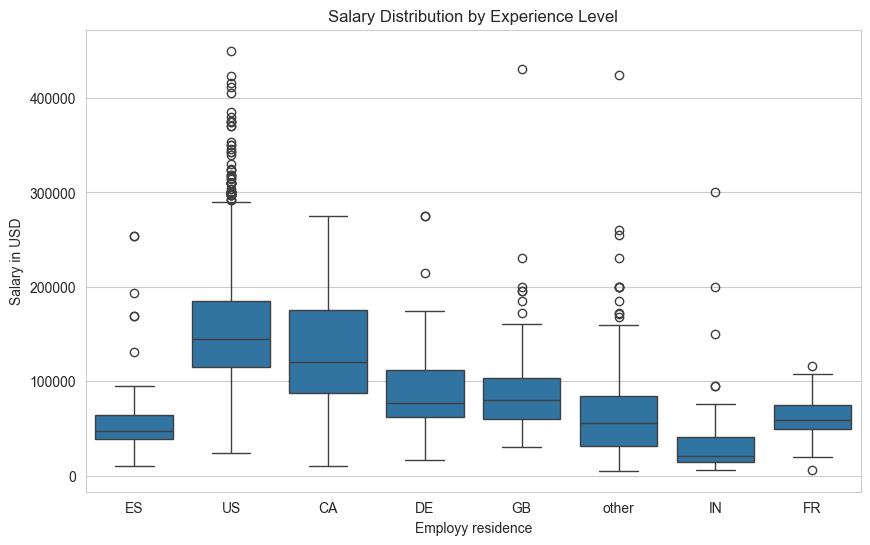

In [699]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='employee_residence', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Employy residence')
plt.ylabel('Salary in USD')
plt.show()

Сравнив boxplot-ы для двух похожих категорий employee-residence и company-location, видно, что местоположение компании сильнее влияет на величину заработной платы, поэтому оставим только эту категорию.

In [700]:
df.drop(['employee_residence'], axis=1, inplace=True)

In [701]:
#Преобразуем колонку company_location через One-hot encoding
one_hot = pd.get_dummies(df["company_location"], drop_first=True).astype('int')
df = pd.concat((df.drop(["company_location"], axis=1), one_hot), axis=1)
df.head()

,work_year,job_title,salary_in_usd,remote_ratio,experience_level_encoding,FL,FT,PT,company_size_encoding,DE,ES,GB,IN,US,other
0,2023,Principal Data Scientist,85847,100,2,0,1,0,2,0,1,0,0,0,0
1,2023,ML Engineer,30000,100,1,0,0,0,0,0,0,0,0,1,0
2,2023,ML Engineer,25500,100,1,0,0,0,0,0,0,0,0,1,0
3,2023,Data Scientist,175000,100,2,0,1,0,1,0,0,0,0,0,0
4,2023,Data Scientist,120000,100,2,0,1,0,1,0,0,0,0,0,0


In [702]:
job_titles = df.job_title.value_counts()
print(job_titles.index)
print(len(job_titles.index))

Index(['Data Engineer', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Analytics Engineer', 'Data Architect',
       'Research Scientist', 'Applied Scientist', 'Data Science Manager',
       'Research Engineer', 'ML Engineer', 'Data Manager',
       'Machine Learning Scientist', 'Data Science Consultant',
       'Data Analytics Manager', 'Computer Vision Engineer', 'AI Scientist',
       'BI Data Analyst', 'Business Data Analyst', 'Data Specialist',
       'BI Developer', 'Applied Machine Learning Scientist',
       'Director of Data Science', 'AI Developer',
       'Machine Learning Infrastructure Engineer', 'Big Data Engineer',
       'Data Operations Engineer', 'Head of Data', 'Applied Data Scientist',
       'ETL Developer', 'Machine Learning Software Engineer',
       'Lead Data Scientist', 'Head of Data Science', 'BI Analyst',
       'Data Science Lead', 'Principal Data Scientist', 'NLP Engineer',
       'Machine Learning Developer', 'Data Quality Analyst'

In [703]:
def ml_transform(data):
    if data.lower().find('machine learning') != -1 or data.lower().find('ml') != -1:
        if data.lower().find('engineer') != -1:
            return 'Machine Learning Engineer'
        elif data.lower().find('scientist') != -1:
            return 'Machine Learning Scientist'
        elif data.lower().find('manager') != -1 or data.lower().find('head') != -1 or data.lower().find('lead') != -1:
            return 'Machine Learning Manager'
    return data
df['job_title_'] = df['job_title'].apply(ml_transform)
df.job_title_.value_counts()

job_title_
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     358
Analytics Engineer            103
                             ... 
Data Science Tech Lead          1
Principal Data Architect        1
Cloud Data Architect            1
Staff Data Scientist            1
Finance Data Analyst            1
Name: count, Length: 83, dtype: int64

In [704]:
def ds_transform(data):
    if data.lower().find('data') != -1:
        if data.lower().find('manager') != -1 or data.lower().find('head') != -1 or data.lower().find('lead') != -1:
            return 'Data Manager'
        elif data.lower().find('engineer') != -1 or data.lower().find('specialist') != -1:
            return 'Data Engineer'
        elif data.lower().find('scientist') != -1:
            return 'Data Scientist'
        elif data.lower().find('analyst') != -1:
            return 'Data Analyst'
        elif data.lower().find('architect') != -1:
            return 'Data Architect'
    return data

    return data
df['job_title_'] = df['job_title_'].apply(ds_transform)
df.job_title_.value_counts()

job_title_
Data Engineer                        1111
Data Scientist                        860
Data Analyst                          668
Machine Learning Engineer             358
Data Manager                          164
Data Architect                        105
Analytics Engineer                    103
Research Scientist                     82
Applied Scientist                      58
Machine Learning Scientist             38
Research Engineer                      37
Data Science Consultant                24
Computer Vision Engineer               18
AI Scientist                           16
BI Developer                           13
Director of Data Science               11
AI Developer                           11
ETL Developer                          10
BI Analyst                              9
NLP Engineer                            7
Machine Learning Developer              7
Machine Learning Researcher             6
Deep Learning Engineer                  6
Computer Vision Softwar

In [705]:
def scientist_transform(data):
    if data.find('Computer Vision Software Engineer') != -1 or data.find('Computer Vision Engineer') != -1 or data.find('NLP Engineer') != -1 or data.find('3D Computer Vision Researcher') != -1 or data.find('Deep Learning Researcher') != -1 or data.find('AI') != -1:
        return 'Deep Learning Engineer'
    if data.find('BI') != -1 or data.find('Business') != -1:
        return 'BI specialist'
    if data.find('ETL') != -1 or data.find('Data Analytics Consultant') != -1 or data.find('Insight Analyst') != -1:
        return 'Data Analyst'
    if data.find('Autonomous Vehicle Technician') != -1 or data.find('Modeler') != -1:
        return 'Data Engineer'
    if data.find('Strategist') != -1 or data.find('Manager') != -1 or data.find('Director') != -1:
        return 'Manager'
    if data.find('Machine Learning Developer') != -1 or data.find('Machine Learning Researcher') != -1:
        return 'Machine Learning Scientist'
    return data
    
df['job_title_'] = df['job_title_'].apply(scientist_transform)
df.job_title_.value_counts()                                        
    


job_title_
Data Engineer                 1115
Data Scientist                 860
Data Analyst                   684
Machine Learning Engineer      358
Manager                        181
Data Architect                 105
Analytics Engineer             103
Research Scientist              82
Deep Learning Engineer          70
Applied Scientist               58
Machine Learning Scientist      51
Research Engineer               37
BI specialist                   27
Data Science Consultant         24
Name: count, dtype: int64

In [706]:
# Удалим первичную колонку с названиеями профессий
df.drop(['job_title'], axis=1, inplace=True)
df.head()

,work_year,salary_in_usd,remote_ratio,experience_level_encoding,FL,FT,PT,company_size_encoding,DE,ES,GB,IN,US,other,job_title_
0,2023,85847,100,2,0,1,0,2,0,1,0,0,0,0,Data Scientist
1,2023,30000,100,1,0,0,0,0,0,0,0,0,1,0,Machine Learning Engineer
2,2023,25500,100,1,0,0,0,0,0,0,0,0,1,0,Machine Learning Engineer
3,2023,175000,100,2,0,1,0,1,0,0,0,0,0,0,Data Scientist
4,2023,120000,100,2,0,1,0,1,0,0,0,0,0,0,Data Scientist


In [707]:
#Преобразуем колонку job_title через One-hot encoding
one_hot = pd.get_dummies(df["job_title_"], drop_first=True).astype('int')
df = pd.concat((df.drop(["job_title_"], axis=1), one_hot), axis=1)
df.head()

,work_year,salary_in_usd,remote_ratio,experience_level_encoding,FL,FT,PT,company_size_encoding,DE,ES,...,Data Architect,Data Engineer,Data Science Consultant,Data Scientist,Deep Learning Engineer,Machine Learning Engineer,Machine Learning Scientist,Manager,Research Engineer,Research Scientist
0,2023,85847,100,2,0,1,0,2,0,1,...,0,0,0,1,0,0,0,0,0,0
1,2023,30000,100,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2023,25500,100,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2023,175000,100,2,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2023,120000,100,2,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


## Применить метод K-Means для кластеризации данных по заработной плате.


- Определить оптимальное количество кластеров.
- Проанализировать характеристики полученных кластеров.
- Визуализировать результаты кластеризации и проанализировать характеристики в каждом кластере.
- Проанализируйте полученные данные и сделайте выводы о том, какой алгоритм кластеризации сможет выделить кластеры лучше, чем K-Means.

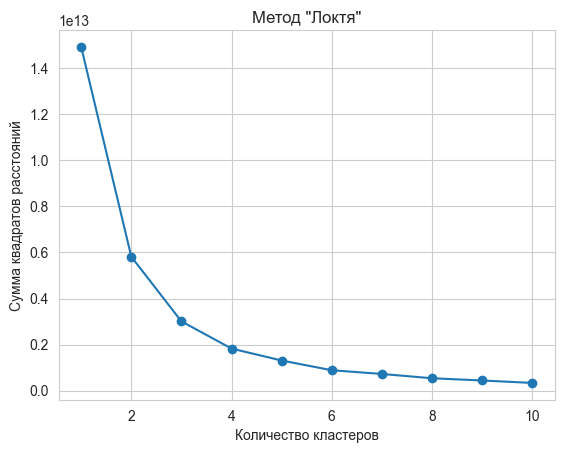

In [708]:
from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.title('Метод "Локтя"')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.show()


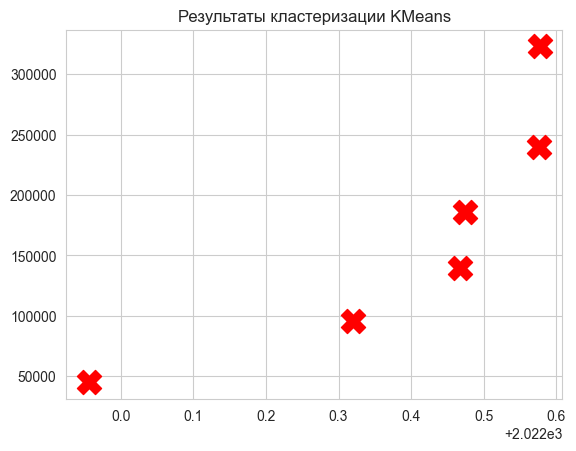

In [709]:
# Применение алгоритма KMeans, исходя из резцльтатов метода локтя возьмем 6 кластеров
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(df)

# Получение меток кластеров
labels = kmeans.labels_

# Визуализация результатов кластеризации
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('Результаты кластеризации KMeans')
plt.show()

## Построение модели линейной регрессии:

- Разделить данные на обучающую и тестовую выборки.
- Построить модель линейной регрессии для прогнозирования заработной платы.
- Оценить качество модели с помощью метрик MAE, MSE и R-квадрат.
- Проанализировать значимость признаков и мультиколлинеарность.

In [710]:
from sklearn.model_selection import train_test_split

X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [711]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x_train_scale = scale.fit_transform(X_train)
x_test_scale = scale.fit_transform(X_test)

In [712]:
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
print('Linear regression, Train')
print(f'MSE: {mean_squared_error(y_train, y_train_pred)},\
\nMAE :{mean_absolute_error( y_train, y_train_pred)},\
\n R2: {r2_score(y_train, y_train_pred)}')

Linear regression, Train
MSE: 2330599037.612687,
MAE :36376.96533475602,
 R2: 0.4145054371898269


In [713]:
y_test_pred = lr.predict(X_test)
print('Linear regression, Test')
print(f'MSE: {mean_squared_error( y_test, y_test_pred)},\
\nMAE: {mean_absolute_error( y_test, y_test_pred)},\
\n R2: {r2_score(y_test, y_test_pred)}')

Linear regression, Test
MSE: 2388088198.7432065,
MAE: 37293.81140462374,
 R2: 0.39508223631751915


**Качество на тестовой выборке соизмеримо с качетсвом на тренировочной при применении линейной регресии, однако качество модели достаточно низкое**

In [714]:
# Добавление нового призенака - номер кластера
df = pd.concat([df, pd.DataFrame(kmeans.labels_, columns=['Clusters'])], axis=1)
df.head()

,work_year,salary_in_usd,remote_ratio,experience_level_encoding,FL,FT,PT,company_size_encoding,DE,ES,...,Data Engineer,Data Science Consultant,Data Scientist,Deep Learning Engineer,Machine Learning Engineer,Machine Learning Scientist,Manager,Research Engineer,Research Scientist,Clusters
0,2023,85847,100,2,0,1,0,2,0,1,...,0,0,1,0,0,0,0,0,0,1
1,2023,30000,100,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
2,2023,25500,100,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
3,2023,175000,100,2,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,5
4,2023,120000,100,2,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [715]:
X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [716]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x_train_scale = scale.fit_transform(X_train)
x_test_scale = scale.fit_transform(X_test)

In [717]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
print('Linear regression, Train')
print(f'MSE: {mean_squared_error(y_train, y_train_pred)},\
\nMAE :{mean_absolute_error( y_train, y_train_pred)},\
\n R2: {r2_score(y_train, y_train_pred)}')

Linear regression, Train
MSE: 1906184030.9101894,
MAE :30672.306648941485,
 R2: 0.5211272433388139


In [718]:
y_test_pred = lr.predict(X_test)
print('Linear regression, Test')
print(f'MSE: {mean_squared_error( y_test, y_test_pred)},\
\nMAE: {mean_absolute_error( y_test, y_test_pred)},\
\n R2: {r2_score(y_test, y_test_pred)}')

Linear regression, Test
MSE: 1932279184.280038,
MAE: 31304.785486899742,
 R2: 0.5105415270759106


**Добавление новогопризнака - кластер, позволило значительно увеличить качество модели**

## Построение модели дерева решений:

- Построить модель дерева решений для прогнозирования заработной платы.
- Оценить качество модели с помощью метрик RMSE и R-квадрат.
- Подберите гиперпараметры для модели дерево решений
- Визуализировать дерево решений.

In [719]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
print('Decision Tree, Train')
print(f'MSE: {mean_squared_error(y_train, y_train_pred)},\
\nMAE :{mean_absolute_error( y_train, y_train_pred)},\
\n R2: {r2_score(y_train, y_train_pred)}')


Decision Tree, Train
MSE: 108402358.63481133,
MAE :7523.835004045469,
 R2: 0.9727670909700993


In [720]:
y_test_pred = dt.predict(X_test)
print('Decision Tree, Test')
print(f'MSE: {mean_squared_error( y_test, y_test_pred)},\
\nMAE: {mean_absolute_error( y_test, y_test_pred)},\
\n R2: {r2_score(y_test, y_test_pred)}')

Decision Tree, Test
MSE: 258419008.4000329,
MAE: 12353.436474361642,
 R2: 0.9345408395147797


In [721]:
max_depths = [5, 9, 13]
min_samples_splits = [2, 4, 6, 8]
min_samples_leafs = [1, 2, 3, 4]
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        for min_samples_leaf in min_samples_leafs:
            dt = DecisionTreeRegressor(random_state=42, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
            dt.fit(X_train, y_train)
            y_train_pred = dt.predict(X_train)
            y_test_pred = dt.predict(X_test)
            print(f' Train, max depth={max_depth}, min samples split={min_samples_split}, min samples leaf={min_samples_leaf}, R2_train={r2_score(y_train, y_train_pred):.2f}, R2_test={r2_score(y_test, y_test_pred):.4f}')

 Train, max depth=5, min samples split=2, min samples leaf=1, R2_train=0.95, R2_test=0.9460
 Train, max depth=5, min samples split=2, min samples leaf=2, R2_train=0.95, R2_test=0.9462
 Train, max depth=5, min samples split=2, min samples leaf=3, R2_train=0.95, R2_test=0.9458
 Train, max depth=5, min samples split=2, min samples leaf=4, R2_train=0.95, R2_test=0.9474
 Train, max depth=5, min samples split=4, min samples leaf=1, R2_train=0.95, R2_test=0.9460
 Train, max depth=5, min samples split=4, min samples leaf=2, R2_train=0.95, R2_test=0.9462
 Train, max depth=5, min samples split=4, min samples leaf=3, R2_train=0.95, R2_test=0.9458
 Train, max depth=5, min samples split=4, min samples leaf=4, R2_train=0.95, R2_test=0.9474
 Train, max depth=5, min samples split=6, min samples leaf=1, R2_train=0.95, R2_test=0.9460
 Train, max depth=5, min samples split=6, min samples leaf=2, R2_train=0.95, R2_test=0.9462
 Train, max depth=5, min samples split=6, min samples leaf=3, R2_train=0.95, R2_

**Дерево решений не переобучилось и показало очень высокие результатв, попробуем анасамблирование, самые высокие значение R2 получились при следующий параметрах: max depth=5, min_samples_split=8, min_samples_leaf=4 **

[Text(0.6792287122483222, 0.9642857142857143, 'x[26] <= 3.5\nsquared_error = 3980564783.431\nsamples = 3004\nvalue = 138055.989'),
 Text(0.4929552672579099, 0.8928571428571429, 'x[26] <= 2.5\nsquared_error = 2941963355.107\nsamples = 2122\nvalue = 111720.119'),
 Text(0.586091989753116, 0.9285714285714286, 'True  '),
 Text(0.3165672938638543, 0.8214285714285714, 'x[26] <= 1.5\nsquared_error = 2208313373.746\nsamples = 1705\nvalue = 128150.229'),
 Text(0.1844289309683605, 0.75, 'x[26] <= 0.5\nsquared_error = 668354893.092\nsamples = 1640\nvalue = 120442.59'),
 Text(0.06567593480345159, 0.6785714285714286, 'x[1] <= 75.0\nsquared_error = 158125173.352\nsamples = 926\nvalue = 140019.928'),
 Text(0.023010546500479387, 0.6071428571428571, 'x[6] <= 0.5\nsquared_error = 164087899.808\nsamples = 545\nvalue = 138769.675'),
 Text(0.019175455417066157, 0.5357142857142857, 'squared_error = 6540428.889\nsamples = 6\nvalue = 123580.667'),
 Text(0.026845637583892617, 0.5357142857142857, 'x[11] <= 0.5\n

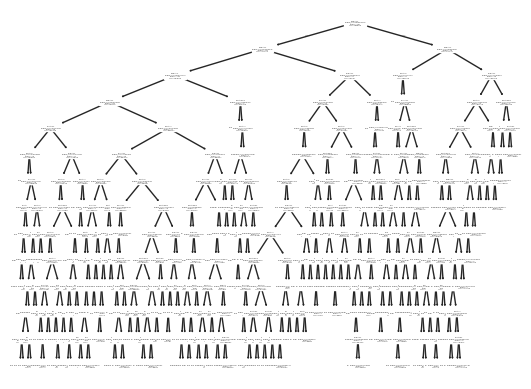

In [722]:
from sklearn import tree

tree.plot_tree(dt)

## Построение ансамблевой модели:


- Построить ансамблевую модель, используя Random Forest и Boosting.
- Сравнить качество ансамблевой модели с отдельными моделями.
- Оценить важность признаков в ансамблевой модели.

In [723]:
from sklearn.ensemble import RandomForestRegressor

# Создание и обучение ансамбля RandomForest
forest_model = RandomForestRegressor(n_estimators=200, random_state=42)
forest_model.fit(X_train, y_train)
forest_predictions_train = forest_model.predict(X_train)
forest_predictions_test = forest_model.predict(X_test)
forest_r2_train = r2_score(y_train, forest_predictions_train)
forest_r2_test = r2_score(y_test, forest_predictions_test)
# Сравнение результатов
print(f"R^2 для RandomForestRegressor train: {forest_r2_train}")
print(f"R^2 для RandomForestRegressor test: {forest_r2_test}")

R^2 для RandomForestRegressor train: 0.9703677247085557
R^2 для RandomForestRegressor test: 0.9455846847283351


In [724]:
from sklearn.ensemble import GradientBoostingRegressor

# Создание и обучение ансамбля GradientBoostingRegressor
boosting_model = GradientBoostingRegressor(n_estimators=200, random_state=42)
boosting_model.fit(X_train, y_train)
boosting_predictions_train = boosting_model.predict(X_train)
boosting_predictions_test = boosting_model.predict(X_test)
boosting_r2_train = r2_score(y_train, boosting_predictions_train)
boosting_r2_test = r2_score(y_test, boosting_predictions_test)
# Сравнение результатов
print(f"R^2 для GradientBoostingRegressor train: {boosting_r2_train}")
print(f"R^2 для GradientBoostingRegressor test: {boosting_r2_test}")

R^2 для GradientBoostingRegressor train: 0.9549087054895489
R^2 для GradientBoostingRegressor test: 0.9437020482938643


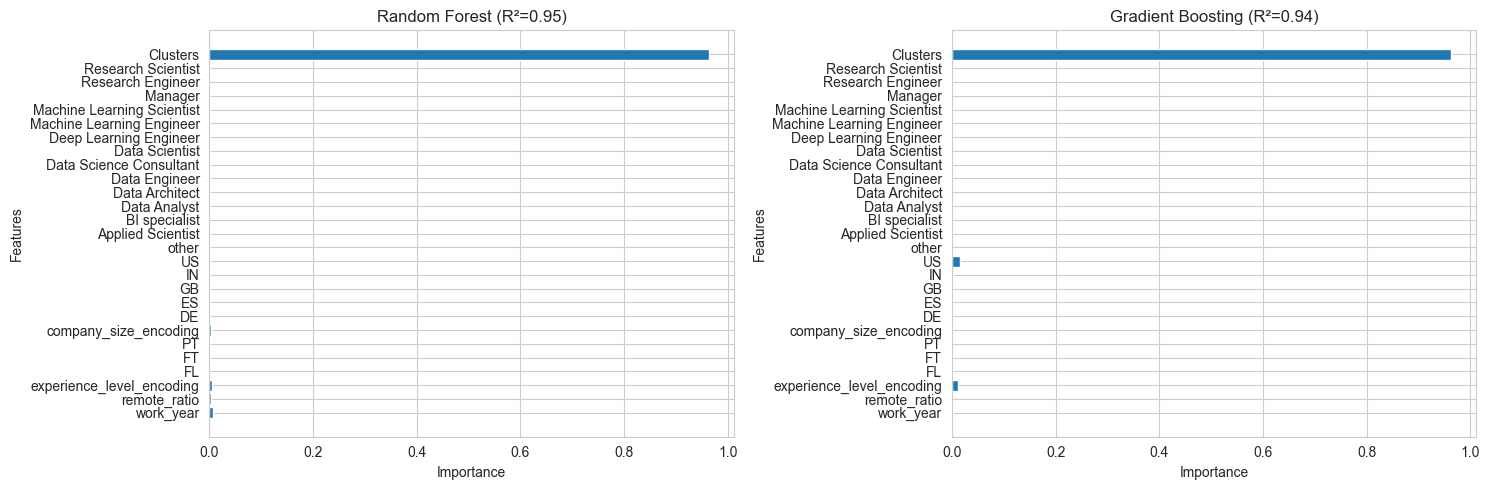

In [725]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Обучение моделей и оценка важности признаков
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for ax, (name, model) in zip(axes, models.items()):
    model.fit(X_train, y_train)
    score = r2_score(y_test, model.predict(X_test))
    feature_importances = model.feature_importances_

    ax.barh(np.arange(len(feature_importances)), feature_importances, align='center')
    ax.set_yticks(np.arange(len(X.columns)))
    ax.set_yticklabels(X.columns)
    ax.set_title(f'{name} (R²={score:.2f})')
    ax.set_xlabel('Importance')
    ax.set_ylabel('Features')

plt.tight_layout()
plt.show()

**Получился очень интересный результат, самый важдный признак - это признак кластеризации, который был построен для разделения данных на признаки. И действительно, кластеризация данных позволила качественно улучшить качество модели.**

## Понижение размерности:

- Применить Principal Component Analysis (PCA) для снижения размерности данных.
- Построить модель линейной регрессии с использованием данных, полученных после PCA.
- Сравнить качество модели с использованием исходных данных.

In [729]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lr = LinearRegression()
lr.fit(X_pca, y_train)
y_train_pred = lr.predict(X_pca)
y_test_pred = lr.predict(X_test_pca)

print(f'R2: {r2_score(y_train, y_train_pred)}')
print(f'R2: {r2_score(y_test, y_test_pred)}')



R2: 0.5211272433388204
R2: 0.5105415270759145


Качество модели при применении снижение размерности - упало.

Таким образом, была проведена большая работа по обработке данных и приведение категориальных признаков в числовые:
- Для признаков Experince level, Company Size -использовался lzbel-encoding, так как данные можно категорезовать по размеру, важности.
- Для признаков Company_Location, Job Title - использовался One-hot encoding. 
- При этом Company Location был модефицирован, если данных по стране было менее 1% от всех данных, то страна переименовывалась в другое.
- Для модификация названия профессии в числовое поле, многие профессии были объеденены по близости выполняемых функций, таки образом стало возможно снизить количество профессий с 93 до 14, что позволило значительно повысить качество модели.

Огромный вклад в построение модели с более высокой точностью являлось кластеризация данных, с помощью метода локтя удалось выявить оптимальное количество кластеров = 6 разбиение модели на кластеры было использовано, как новый параметр для обучения моделей линейной регресии, дерева решений и ансамблевых моделей.

Модель линейной регрессии показало следующие результаты *до* использование нового признака - кластеры:
- R2  на тренировочной выборке - 0.41;
- R2  на тестовой выборке - 0.4.
Модель не переобучилась.

Модель линейной регрессии показало следующие результаты *после* использование нового признака - кластеры:
- R2  на тренировочной выборке - 0.52;
- R2  на тестовой выборке - 0.51.
Модель не переобучилась, качество модели улучшилось.

Модель дерева решений показало следующие результаты *после* использование нового признака - кластеры:
- R2  на тренировочной выборке - 0.97;
- R2  на тестовой выборке - 0.93
Модель переобучилась, однако модель дерева решений кординально позволило повысит качество.
Были подобраны следующие параметры, при которых качество модели дерева решений максимально 0.947 на тестовой выборке: max depth=5, min_samples_split=8, min_samples_leaf=4.

Ансамблевая модель RandomForest показала следующие результаты *после* использование нового признака - кластеры:
- R2  на тренировочной выборке - 0.97;
- R2  на тестовой выборке - 0.945
Результаты модели Случайный лес с параметрами по умолчанию соизмеримы с качеством модели дерева решений после подбора параметров. Подбор параметров модели случайного леса не производился.

Ансамблевая модель GradientBoost показала следующие результаты *после* использование нового признака - кластеры:
- R2  на тренировочной выборке - 0.955;
- R2  на тестовой выборке - 0.944
 
Результаты модели GradientBoost с параметрами по умолчанию соизмеримы с качеством модели дерева решений после подбора параметров. Подбор параметров модели градиентного бустинга не производился.

Использование метода PCA для понижения размерности, к сожалению не показал значемых результатов:
- R2  на тренировочной выборке - 0.52;
- R2  на тестовой выборке - 0.51.
Результаты соизмеримы с результатами применения модели линейной регресии.

Самым важным признаком оказаляся признак сгенерированный в результате кластеризации данных - Clusters.
